## Tracy Owusu 
### 500819150

## Table of context

1. [Dataset](#Dataset)
2. [Analyse probleem](#Analyse)
3. [Voorspelling en methoden](#Voorspelling)
4. [Preprocessing](#Preprocessing)
5. [Linear regression zonder kleur](#Linear)
6. [Linear regression met kleur](#Linear)
7. [Random forest zonder kleur](#Random)
8. [Random forest met kleur](#Random)
9. [Evaluatie/conclusie](#Evaluatie/conclusie)
10. [PCA](#PCA)

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.ensemble import RandomForestClassifier 

## Dataset

Deze dataset is een dataset over de kwaliteit van melk. Ik heb de dataset van [kaggle](https://www.kaggle.com/datasets/cpluzshrijayan/milkquality).

## Analyse probleem
Voor dit experiment wil ik graag de pH waarde van melk voorspellen. Het probleem is een linear probleem. Deze dataset bestaat uit 8 features en heeft 1059 rijen aan data. Het heeft de features **pH, Temprature, Taste, Odor, Fat, Turbidity, Colour** en **Grade**. 

**pH** geeft de ph waarde aan. <br>
**Temprature** is het aangegeven temperatuur in celsius. <br>
De **taste, odor, fat** en **turbidity** zijn aangegeven met een 1 of 0. Hierbij werkt de criteria dat als ze voldoen aan de optimale omstandigheden krijgen ze een 1, anders 0. <br>
Waar de **kleuren** exact voor staan is niet bij de dataset gemeld. Ik denk zelf dat de kleuren allemaal rgb zijn en dat het aangegeven getal bij elke letter hoort. Bijvoorbeeld met 254 is de rgb(254, 254, 254) en bij 250 de rgb(250, 250, 250).  <br>
**Grade** geeft aan de kwaliteit laag, medium of hoog is.

In [27]:
data=pd.read_csv('milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [28]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [29]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


## Voorspelling en methoden
Na een poging van het analyseren van data ga ik gebruik maken van **linear regression en random forest**. De lineare reggrision probeert een constante waarde te voorspellen aan de hand van de eigenschappen. De random forest maakt gebruik van ensemble learning. Het maakt meerdere decision trees en combineert ze. Ik denk dat de random forest een beter resultaat zal opleveren, vanwege het gebruik van ensemble learning

Ik denk dat elke parameter relevant zal zijn, maar omdat wat de getallen van kleur precies voor betekenen zijn onduidelijk. Ik zal daarom experimenteren met en zonder de kleur.

In [30]:
le = LabelEncoder()
selectect_columns = ["high", "medium", "low"]
data["Grade"] = le.fit_transform(data["Grade"])
print("Om ook de grades te makkelijker kunnen vergelijken heb ik ze met een labelencoder.")
print(data)

Om ook de grades te makkelijker kunnen vergelijken heb ik ze met een labelencoder.
       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6          35      1     0     1          0     254      0
1     6.6          36      0     1     0          1     253      0
2     8.5          70      1     1     1          1     246      1
3     9.5          34      1     1     0          1     255      1
4     6.6          37      0     0     0          0     255      2
...   ...         ...    ...   ...   ...        ...     ...    ...
1054  6.7          45      1     1     0          0     247      2
1055  6.7          38      1     0     1          0     255      0
1056  3.0          40      1     1     1          1     255      1
1057  6.8          43      1     0     1          0     250      0
1058  8.6          55      0     1     1          1     255      1

[1059 rows x 8 columns]


Ik wil zien of de features correlaties hebben met de ph waarde


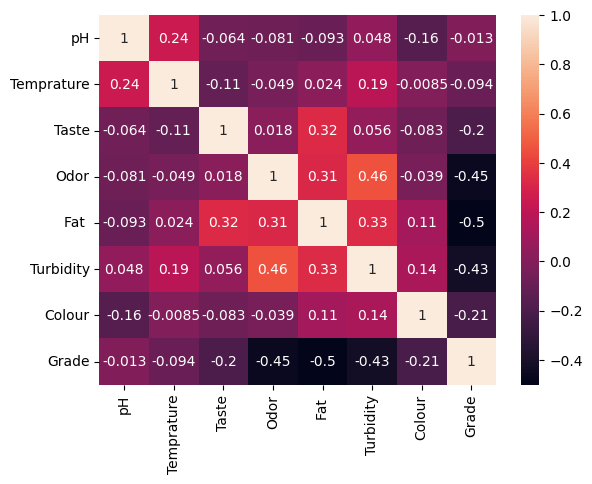

Er zijn geen correlaties met de ph waarde die overduidelijk zijn. Wel is temperatuur het duidelijkst.


In [31]:
cor = data.corr()
print("Ik wil zien of de features correlaties hebben met de ph waarde")
sns.heatmap(cor, annot=True)
plt.show()
print("Er zijn geen correlaties met de ph waarde die overduidelijk zijn. Wel is temperatuur het duidelijkst.")

De histogram geeft aan dat de meeste pH waardes tussen de 6 en 7 zitten. De temperatuur van de meeste waardes liggen aan een lagere kant. En van de kleur is de kleur van veel waardes aan de hoge kant.


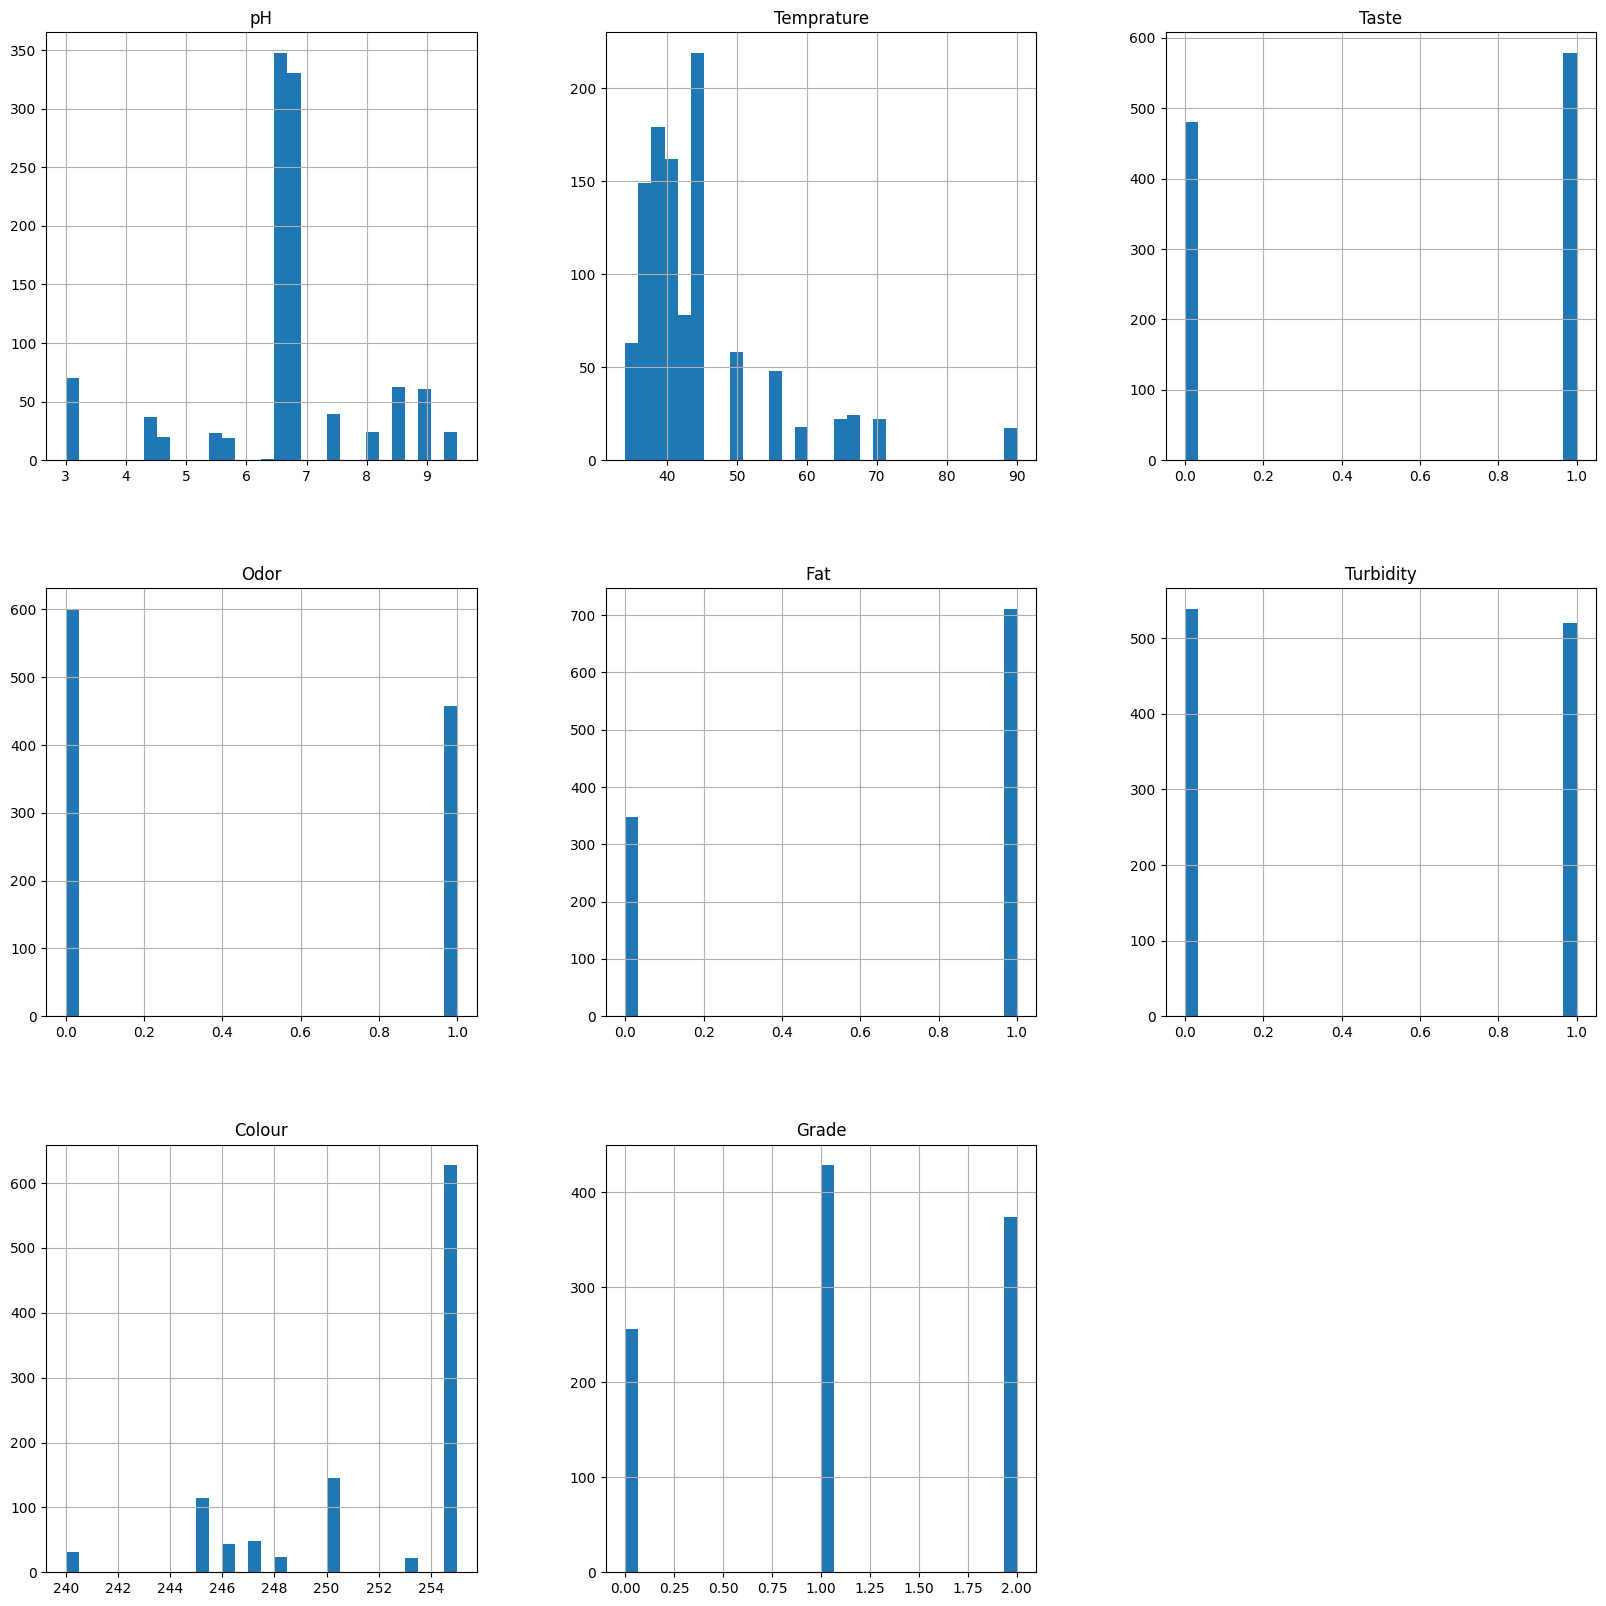

In [32]:
data.hist(bins=30, figsize=(20, 20)) 
print("De histogram geeft aan dat de meeste pH waardes tussen de 6 en 7 zitten. De temperatuur van de meeste waardes liggen aan een lagere kant. En van de kleur is de kleur van veel waardes aan de hoge kant.")

### Preprocessing

In [33]:
data = data.astype({'pH':'int64'})

In [34]:
x = data.drop(["pH", "Colour"], axis = 1)
y = data['pH']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41) 

In [35]:
x2 = data.drop(["pH"], axis = 1)
y2 = data['pH']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 41)

### Linear regression zonder kleur

In [36]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test) 

In [37]:
lr_score = metrics.r2_score(y_test, lr_pred)
lr_score

0.10892969633969185

### Linear regression met kleur

In [38]:
lr2_model = LinearRegression()
lr2_model.fit(x2_train, y2_train)
lr2_pred = lr2_model.predict(x2_test)

In [39]:
lr2_score = metrics.r2_score(y2_test, lr2_pred)
lr2_score

0.13941966756307977

### Random forest zonder kleur

In [40]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)

In [41]:
rfc_score = metrics.accuracy_score(rfc_pred, y_test)
rfc_score

1.0

### Random forest met kleur

In [42]:
rfc2_model = RandomForestClassifier()
rfc2_model.fit(x2_train, y2_train)
rfc2_pred = rfc2_model.predict(x2_test)

In [43]:
rfc2_score = metrics.accuracy_score(rfc2_pred, y_test)
rfc2_score

1.0

## Evaluatie/conclusie

De r2_score is een performance metric for de regressie. De score is altijd tussen de 0 en 1. Pas vanaf 0.4 kan het resultaat van het model als goed worden gezien.

In [44]:
print("lineare regressie zonder kleur: " + str(lr_score))
print("lineare regressie met kleur: " + str(lr2_score))
print("random forest zonder kleur: " + str(rfc2_score))
print("random forest met kleur: " + str(rfc2_score))

lineare regressie zonder kleur: 0.10892969633969185
lineare regressie met kleur: 0.13941966756307977
random forest zonder kleur: 1.0
random forest met kleur: 1.0


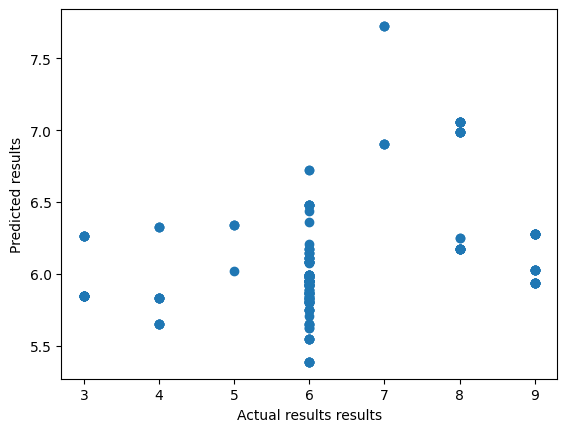

In [45]:
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual results results')
plt.ylabel('Predicted results')
plt.show()

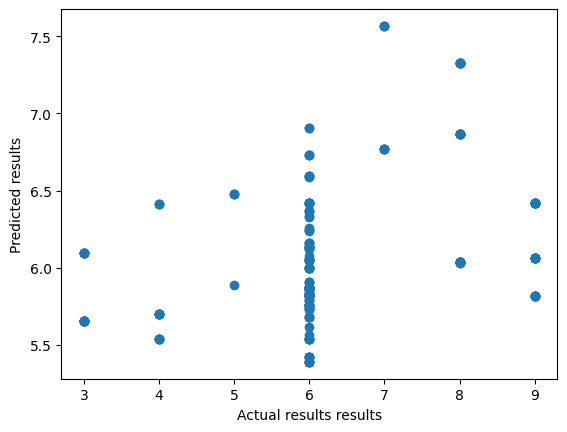

In [46]:
plt.scatter(y2_test, lr2_pred)
plt.xlabel('Actual results results')
plt.ylabel('Predicted results')
plt.show()

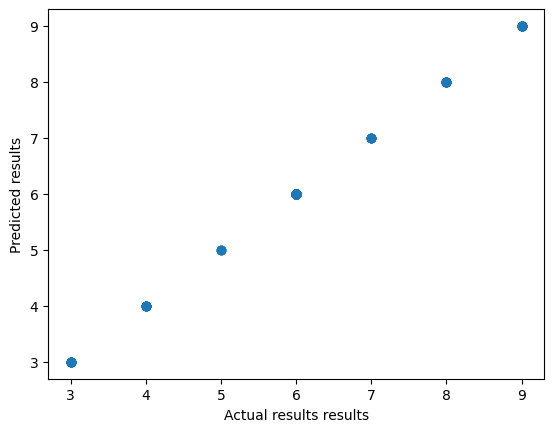

In [47]:
plt.scatter(y_test, rfc_pred)
plt.xlabel('Actual results results')
plt.ylabel('Predicted results')
plt.show()

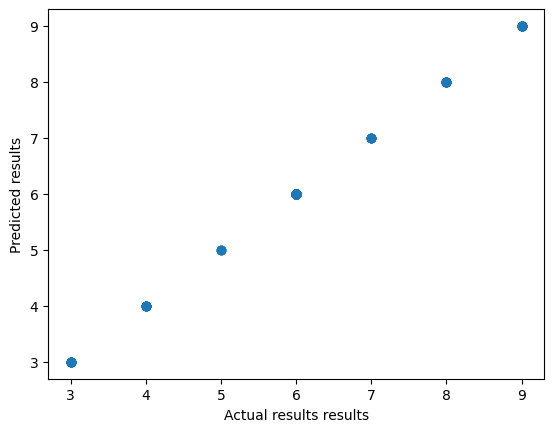

In [48]:
plt.scatter(y2_test, rfc2_pred)
plt.xlabel('Actual results results')
plt.ylabel('Predicted results')
plt.show()

Voor de linear regression kan ik aan de de geplotte resultaten zien hoe er hoogwaarschijnlijk overfitting plaats vond. Alle voorspelde resultaten zitten tussen de 5 en 8. De dataset bevat ph waardes van 3 tot 9.5 is. Wel was het me ook al bij het bekijken van de dataset, dat veel van de data van ph waardes waren tussen de 6 en 8.

Voor de Random regression denk ik dat er ergens iets fout is gegaan. Hoewel ik wel een hoge accuraatheid had verwacht, had ik niet verwacht dat alles perfect getest zou worden.

## PCA

Hierbij probeer ik deze dataset op dezelfde manier te voorspellen alleen maak ik gebruik van de pca.

In [57]:
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6,35,1,0,1,0,254,0
1,6,36,0,1,0,1,253,0
2,8,70,1,1,1,1,246,1
3,9,34,1,1,0,1,255,1
4,6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6,45,1,1,0,0,247,2
1055,6,38,1,0,1,0,255,0
1056,3,40,1,1,1,1,255,1
1057,6,43,1,0,1,0,250,0


In [58]:
x = data.drop(["pH", "Colour"], axis = 1)
y = data['pH']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41) 

In [60]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

### Linear regression zonder kleur

In [61]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test) 

In [62]:
lr_score = metrics.r2_score(y_test, lr_pred)
lr_score

0.10892969633969196

### Random forest zonder kleur

In [63]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)

In [64]:
rfc2_score = metrics.accuracy_score(rfc2_pred, y_test)
rfc2_score

1.0

Na het uitvoeren van de pca heb is er geen verschil in het resultaat gekomen, waarschijnlijk omdat de dataset al vrijwel klein is.